# PLANTILLA PRESELECCIÓN DE VARIABLES

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

## 1. IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance


#Automcompletar rápido
%config IPCompleter.greedy=True

## 2. IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/Oscar/OneDrive - FM4/Escritorio/Python Data Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/007_AIRBNB'

Nombres de los ficheros de datos.

In [3]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [4]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

## 3. MÉTODOS SUPERVISADOS

### 3.1. Preparar x e y

In [5]:
target = 'pisos_rentables'
x = df.drop(columns = target).copy()
y =  df[target].copy()

### 3.2. Mutual Information

#### 3.2.1. Crear una función para mostrar el resultado

In [6]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

#### 3.2.2. Calcular y revisar

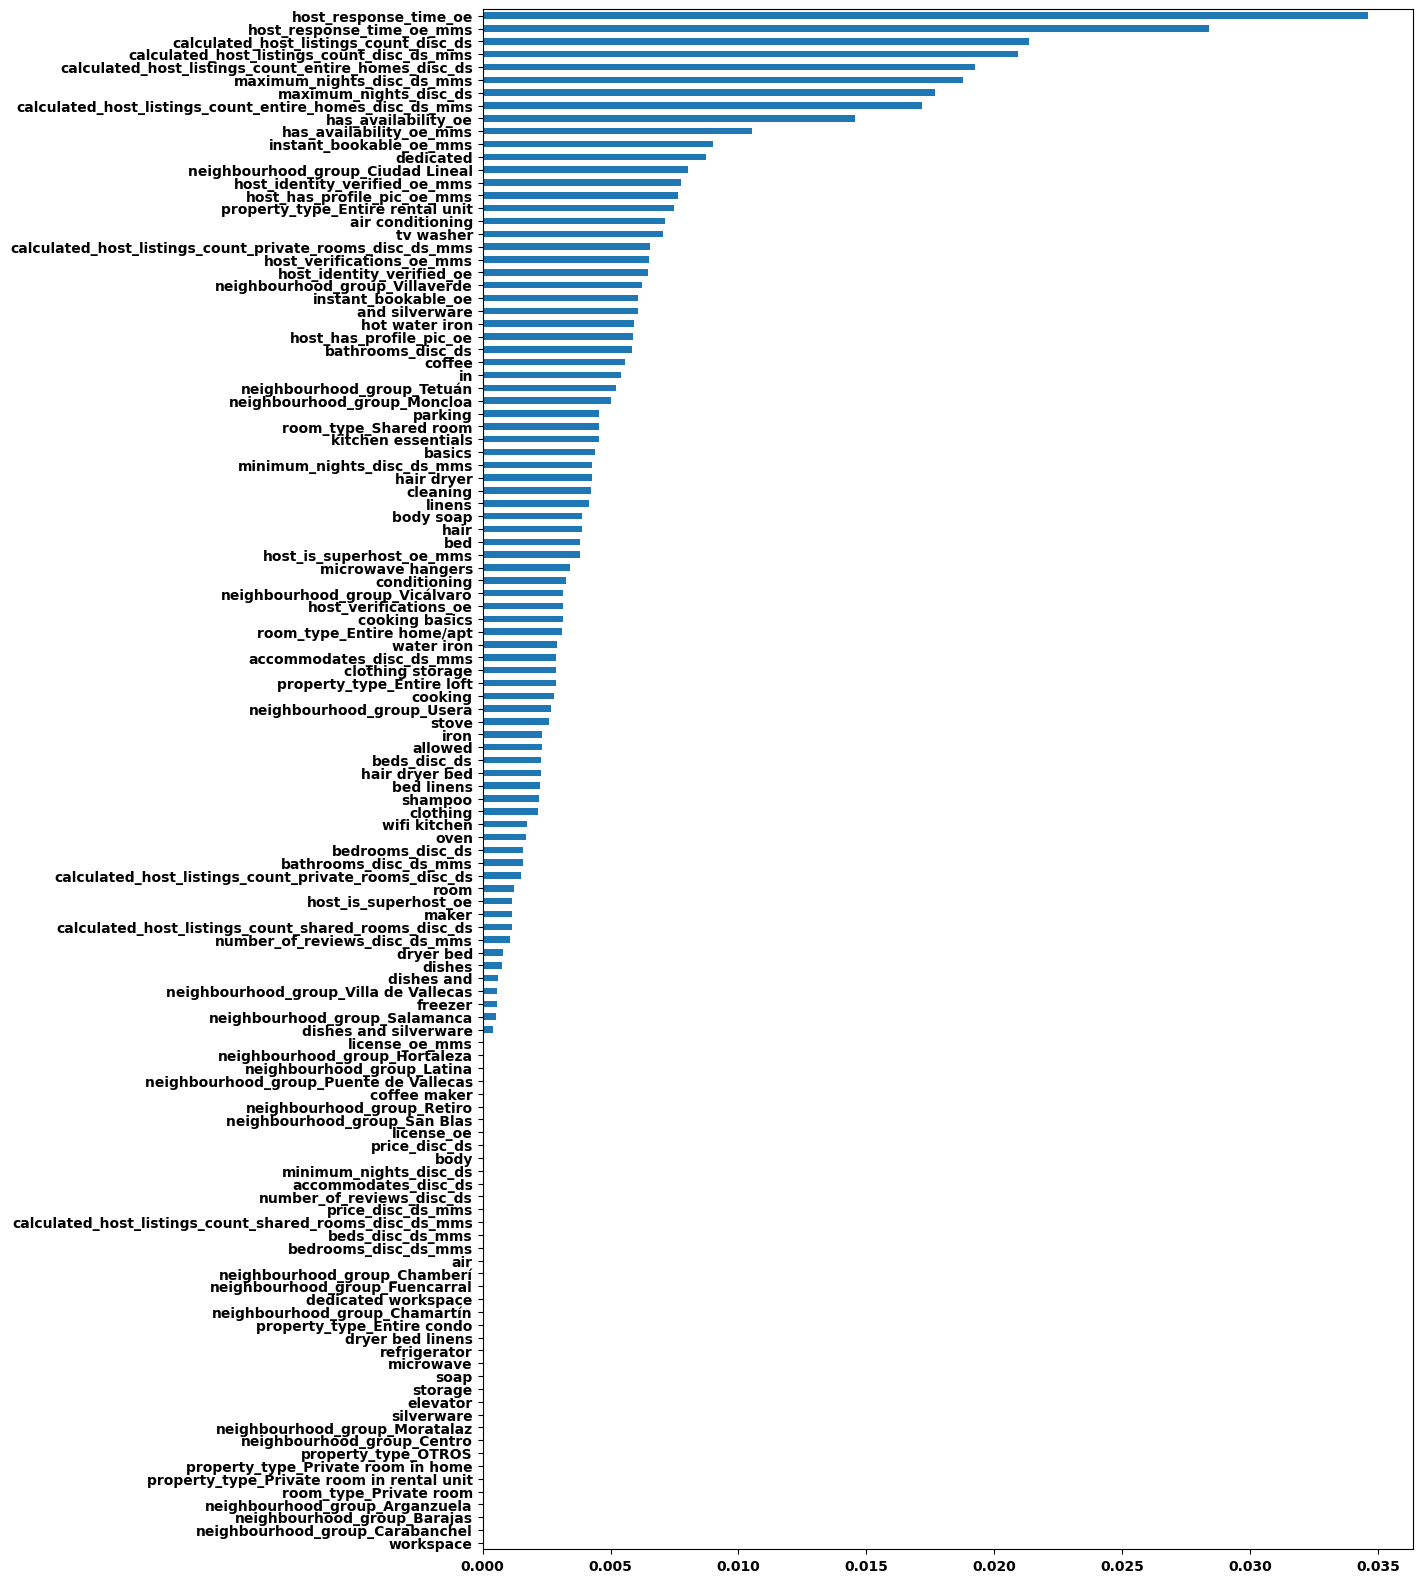

In [7]:
mutual_selector = mutual_info_classif(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

In [8]:
#Mostrar el máximo de columnas posibles de una tabla
pd.set_option('display.max_rows', 200) #Número de columnas que deben verse. None = Máx
rank_mi = ranking_mi(mutual_selector)
rank_mi.head(126)

,variable,importancia_mi,ranking_mi
30,host_response_time_oe,0.034615,0
50,host_response_time_oe_mms,0.028405,1
42,calculated_host_listings_count_disc_ds,0.021370,2
62,calculated_host_listings_count_disc_ds_mms,0.020917,3
43,calculated_host_listings_count_entire_homes_di...,0.019241,4
61,maximum_nights_disc_ds_mms,0.018757,5
41,maximum_nights_disc_ds,0.017673,6
63,calculated_host_listings_count_entire_homes_di...,0.017190,7
35,has_availability_oe,0.014554,8
55,has_availability_oe_mms,0.010516,9


#### 3.2.3. Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [9]:
posicion_variable_limite = 86

##### Extraer los nombres de las que entran

In [10]:
entran_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [11]:
x_mi = x[entran_mi].copy()

### 3.3. Recursive Feature Elimination

#### 3.3.1. Instanciar

In [12]:
rfe = RFE(estimator = XGBClassifier( n_jobs = -1, eval_metric='auc'))

#### 3.3.2. Entrenar

In [13]:
rfe.fit(x,y)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric='auc',
                            feature_types=None, gamma=None, grow_policy=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=None, max_bin=None,
                            max_cat_threshold=None, max_cat_to_onehot=None,
                            max_delta_step=None, max_depth=None,
                            max_leaves=None, min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=None, n_jobs=-1,
                            num_parallel_tree=None, random_state=None, ...))

##### Extraer los nombres de las que entran

In [14]:
entran_rfe = x.columns[rfe.support_]

#### 3.3.3. Crear el dataframe con la selección

In [15]:
x_rfe = x[entran_rfe].copy()

### 3.4. Permutation Importance

#### 3.4.1. Crear una función para mostrar el resultado

In [16]:
def ranking_per(predictoras,permutxacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

#### 3.4.2. Instanciar y entrenar

In [17]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')
xgb = XGBClassifier(n_jobs = -1, eval_metric='auc')
xgb.fit(x,y)
permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'roc_auc',
                                     n_repeats=5, n_jobs = -1)

#### 3.4.3. Revisar la salida

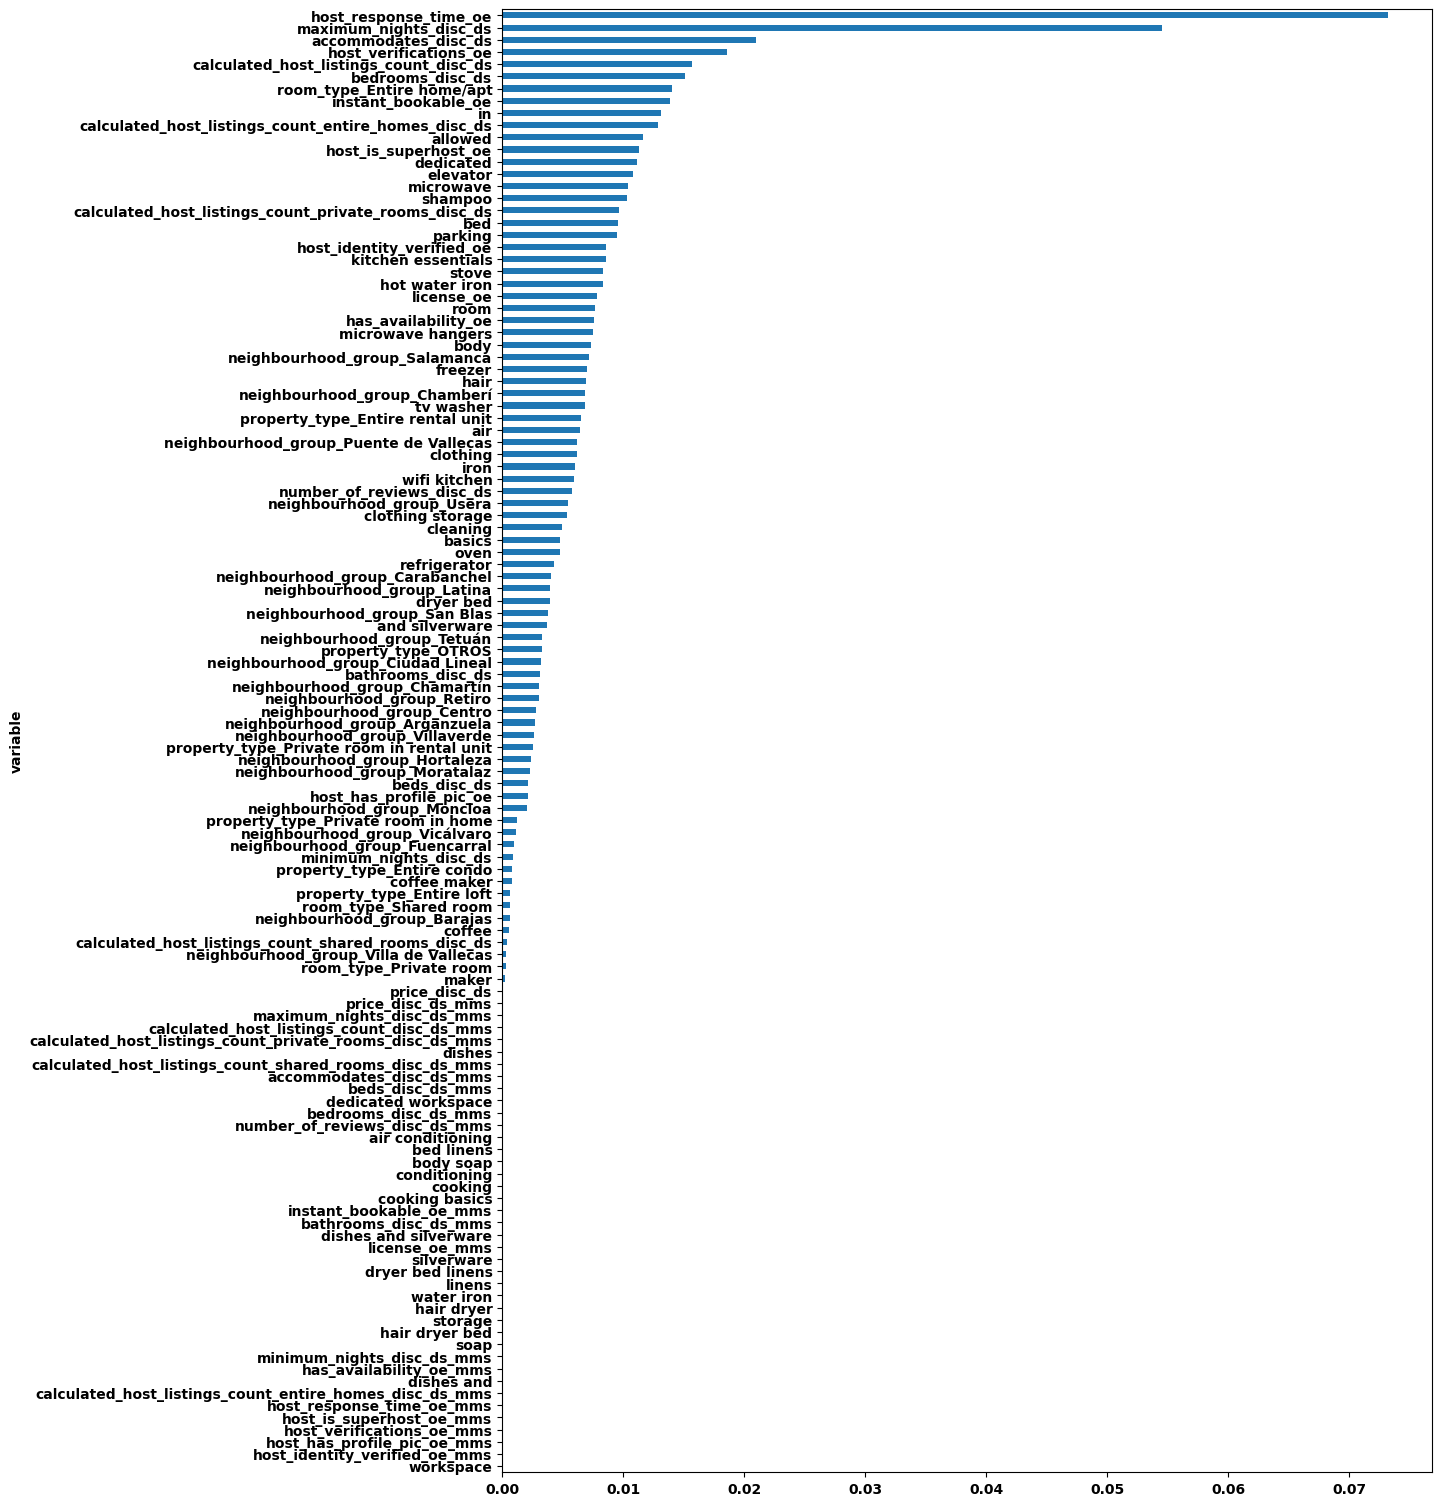

In [18]:
rank_per = ranking_per(x,permutacion)

rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (12,19));

#### 3.4.4. Seleccionar las variables que pasan

In [19]:
rank_per = ranking_per(x,permutacion)
rank_per.head(126)

,variable,importancia_per,ranking_per
30,host_response_time_oe,0.073175,0
41,maximum_nights_disc_ds,0.054543,1
46,accommodates_disc_ds,0.020950,2
32,host_verifications_oe,0.018580,3
42,calculated_host_listings_count_disc_ds,0.015724,4
48,bedrooms_disc_ds,0.015136,5
6,room_type_Entire home/apt,0.014024,6
37,instant_bookable_oe,0.013907,7
100,in,0.013148,8
43,calculated_host_listings_count_entire_homes_di...,0.012872,9


##### Definir la posición de la última variable que va a entrar

In [20]:
posicion_variable_limite = 78

##### Extraer los nombres de las que entran

In [21]:
entran_per = rank_per.iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [22]:
x_per = x[entran_per].copy()

### 3.5. SUPER RANKING

Otra forma es hacer los métodos y despues un SUPER RANKING para hacer la selección

In [23]:
#PASO 1. Preparar x e y. Cuidado si no se ha definido la target previamente
target = 'pisos_rentables'
x = df.drop(columns = target).copy()
y = df[target].copy()

#PASO 2. MÉTODOS PRESELECCION
#Método 1. MUTUAL INFORMATION
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)
mutual_selector = mutual_info_classif(x,y)
x_mi = ranking_mi(mutual_selector)
x_mi

#Método 2. RECURSIVE FEATURE ELIMINATION SIN validación cruzada
rfe = RFE(estimator = XGBClassifier(n_jobs = -1, eval_metric='auc'))
rfe.fit(x,y)
#Ranking. Las 1 son las que él seleccionaría para maximizar la métrica.
rfe.ranking_
#Dataframe de variable y ranking
x_rfe = pd.DataFrame({'variable': x.columns, 'ranking_rfe': rfe.ranking_}).sort_values(by = 'ranking_rfe')

#Método 3. PERMUTATION IMPORTANCE
xgb = XGBClassifier(use_label_encoder=False, n_jobs = -1, eval_metric='auc')
xgb.fit(x,y)
permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'roc_auc',#Metrica regresión o clasificación
                                     n_repeats=5, n_jobs = -1)
#Creamos una función que nos genere un dataframe con la importancia y una columna de ranking.
def ranking_per(predictoras,permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)
x_per = ranking_per(x,permutacion)
x_per

#PASO 3. SUPER RANKING
#Función para unir todas los métodos anteriores en un solo dataframe
def ranking_tot(x_mi, x_rfe, x_per):
    ranking_tot = pd.merge(pd.merge(x_mi, x_rfe), x_per)
    ranking_tot['puntos'] = ranking_tot.ranking_mi + ranking_tot.ranking_rfe + ranking_tot.ranking_per
    ranking_tot.sort_values(by = 'puntos', inplace=True)
    ranking_tot['ranking_tot'] = range(0,len(ranking_tot.variable))
    return(ranking_tot)
super_ranking = ranking_tot(x_mi, x_rfe, x_per)
super_ranking
#Seleccionamos el número de las variables con las que queremos trabajar. Ej. [0:20]
x_sr = x[ranking_tot(x_mi, x_rfe, x_per)[0:57].variable].copy()
x_sr

#Gráfico 20 primeras variables según los puntos
#super_ranking.set_index('variable').puntos.sort_values(ascending = False).plot.barh(figsize = (8,10));
#Gráfico 20 primeras variables según el ranking_tot
#super_ranking.set_index('variable').ranking_tot[0:20].sort_values(ascending = False).plot.barh(figsize = (8,10));

#Despues de este proceso haríamos la modelización de ML para predecir resultados

,host_response_time_oe,maximum_nights_disc_ds,calculated_host_listings_count_disc_ds,calculated_host_listings_count_entire_homes_disc_ds,instant_bookable_oe,host_identity_verified_oe,shampoo,has_availability_oe,parking,bed,...,host_has_profile_pic_oe,neighbourhood_group_Latina,hair,beds_disc_ds,host_is_superhost_oe,room_type_Shared room,refrigerator,wifi kitchen,neighbourhood_group_Retiro,linens
0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,1,1,...,1.0,1.0,1,0.0,0.0,0.0,1,1,0.0,1
1,0.0,3.0,0.0,0.0,0.0,0.0,1,1.0,0,0,...,1.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,0,...,1.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0
3,4.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0,0,...,1.0,0.0,1,0.0,0.0,0.0,1,0,0.0,0
4,0.0,1.0,0.0,0.0,0.0,1.0,1,0.0,1,1,...,1.0,0.0,1,0.0,0.0,0.0,1,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18134,3.0,1.0,0.0,0.0,1.0,1.0,1,0.0,0,1,...,1.0,0.0,1,0.0,0.0,0.0,1,1,0.0,1
18135,4.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0,0,...,1.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0
18136,3.0,1.0,0.0,0.0,1.0,1.0,1,0.0,0,1,...,1.0,1.0,1,0.0,0.0,0.0,1,1,0.0,1
18137,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0,0,...,1.0,0.0,0,0.0,0.0,0.0,0,1,0.0,0


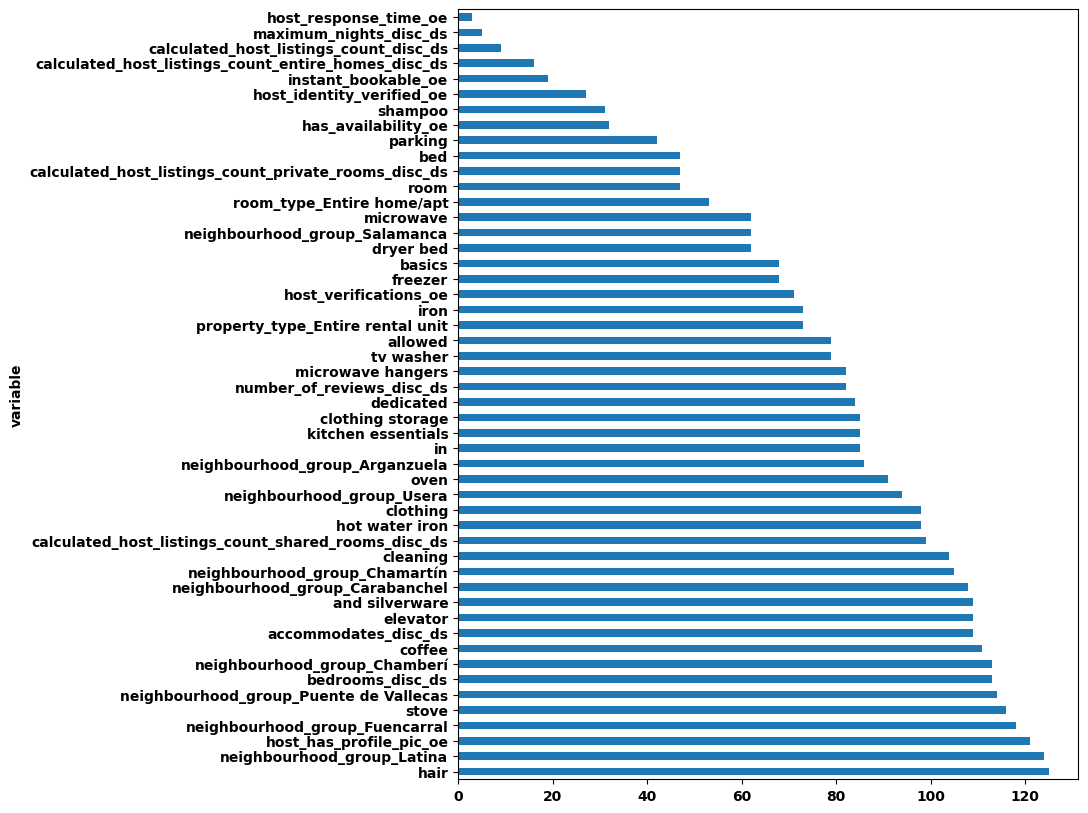

In [24]:
super_ranking.set_index('variable').puntos[0:50].sort_values(ascending = False).plot.barh(figsize = (8,10));

## 4. SELECCIONAR EL MÉTODO FINAL

Descomentar el método de preselección elegido y dejar comentados el resto.

In [25]:
# x_preseleccionado = x_mi
# x_preseleccionado = x_rfe
# x_preseleccionado = x_per
x_preseleccionado = x_sr

In [26]:
x_sr

,host_response_time_oe,maximum_nights_disc_ds,calculated_host_listings_count_disc_ds,calculated_host_listings_count_entire_homes_disc_ds,instant_bookable_oe,host_identity_verified_oe,shampoo,has_availability_oe,parking,bed,...,host_has_profile_pic_oe,neighbourhood_group_Latina,hair,beds_disc_ds,host_is_superhost_oe,room_type_Shared room,refrigerator,wifi kitchen,neighbourhood_group_Retiro,linens
0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,1,1,...,1.0,1.0,1,0.0,0.0,0.0,1,1,0.0,1
1,0.0,3.0,0.0,0.0,0.0,0.0,1,1.0,0,0,...,1.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,0,...,1.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0
3,4.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0,0,...,1.0,0.0,1,0.0,0.0,0.0,1,0,0.0,0
4,0.0,1.0,0.0,0.0,0.0,1.0,1,0.0,1,1,...,1.0,0.0,1,0.0,0.0,0.0,1,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18134,3.0,1.0,0.0,0.0,1.0,1.0,1,0.0,0,1,...,1.0,0.0,1,0.0,0.0,0.0,1,1,0.0,1
18135,4.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0,0,...,1.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0
18136,3.0,1.0,0.0,0.0,1.0,1.0,1,0.0,0,1,...,1.0,1.0,1,0.0,0.0,0.0,1,1,0.0,1
18137,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0,0,...,1.0,0.0,0,0.0,0.0,0.0,0,1,0.0,0


## 5. MÉTODOS NO SUPERVISADOS

### 5.1. Correlación

#### 5.1.1. Crear una función para mostrar el resultado

In [27]:
def correlaciones_fuertes(df, lim_inf = 0.3, lim_sup = 1,drop_dupli=True):
    #Calcula la matriz de correlación
    c = df.corr().abs()
    #Lo pasa todo a filas
    c= c.unstack()
    #Pasa el índice a columnas y le pone nombres
    c = pd.DataFrame(c).reset_index()
    c.columns = ['var1','var2','corr']
    #A dataframe, filtra limites y ordena en descendiente
    c = c.loc[(c['corr'] > lim_inf) &  (c['corr'] < lim_sup),:].sort_values(by = 'corr', ascending=False)
    #Desduplica las correlaciones (o no si drop_dupli es False)
    c = c if drop_dupli == False else c.drop_duplicates(subset = ['corr'])
    #Devuelve la salida
    return(c)

#### 5.1.2. Calcular y revisar

##### Calcular

In [28]:
cor_finales = correlaciones_fuertes(x_preseleccionado)

##### Revisar agregado

In [29]:
#Número de veces que var1 aparece en relacion con diferentes variables. Ej. var1//variacion_tasa_empleo_bin_rs = 6 veces
cor_finales.var1.value_counts()

var1
hot water iron                            14
basics                                    13
and silverware                            13
hair                                      13
coffee                                    12
kitchen essentials                        11
refrigerator                              11
microwave                                 11
cleaning                                  11
linens                                    10
freezer                                    9
microwave hangers                          8
iron                                       8
clothing                                   8
clothing storage                           7
host_response_time_oe                      7
in                                         7
dryer bed                                  6
oven                                       6
bed                                        5
stove                                      5
room                                       5
allow

##### Revisar detalle

In [30]:
#Opciones si hay muchas variables con altas correlaciones:
#1. Rehacer el reescalado porque se ha hecho mas de un proceso sobre la misma variable (04_Plantilla Transformacion de datos)
#2. Usar algoritmos como los árboles de decisión o Random Forest que no les afectan las correlaciones entre variables
cor_finales.head(40)

,var1,var2,corr
117,calculated_host_listings_count_disc_ds,calculated_host_listings_count_entire_homes_di...,0.976779
1571,clothing storage,clothing,0.885304
1152,property_type_Entire rental unit,room_type_Entire home/apt,0.842936
1900,hot water iron,iron,0.810564
3205,linens,dryer bed,0.789966
2321,and silverware,coffee,0.741343
3061,refrigerator,and silverware,0.721872
2806,hair,dryer bed,0.721634
3036,refrigerator,microwave,0.700729
2390,coffee,refrigerator,0.693067


In [31]:
max_correlacion = 0.96
exceso_correlacion = cor_finales.var1.loc[cor_finales['corr']>=max_correlacion].to_list()
exceso_correlacion

['calculated_host_listings_count_disc_ds']

#### 5.1.3. Filtrar variables

Automáticamente se descartarán las variables que hayan superado la correlación máxima que hayamos definido y se generará una lista con el resto de las variables

In [32]:
a_eliminar_corr = exceso_correlacion

In [33]:
x_preseleccionado.drop(columns = a_eliminar_corr, inplace = True)

In [34]:
x_preseleccionado.columns.to_list()

['host_response_time_oe',
 'maximum_nights_disc_ds',
 'calculated_host_listings_count_entire_homes_disc_ds',
 'instant_bookable_oe',
 'host_identity_verified_oe',
 'shampoo',
 'has_availability_oe',
 'parking',
 'bed',
 'calculated_host_listings_count_private_rooms_disc_ds',
 'room',
 'room_type_Entire home/apt',
 'dryer bed',
 'neighbourhood_group_Salamanca',
 'microwave',
 'basics',
 'freezer',
 'host_verifications_oe',
 'iron',
 'property_type_Entire rental unit',
 'allowed',
 'tv washer',
 'microwave hangers',
 'number_of_reviews_disc_ds',
 'dedicated',
 'in',
 'clothing storage',
 'kitchen essentials',
 'neighbourhood_group_Arganzuela',
 'oven',
 'neighbourhood_group_Usera',
 'clothing',
 'hot water iron',
 'calculated_host_listings_count_shared_rooms_disc_ds',
 'cleaning',
 'neighbourhood_group_Chamartín',
 'neighbourhood_group_Carabanchel',
 'elevator',
 'accommodates_disc_ds',
 'and silverware',
 'coffee',
 'neighbourhood_group_Chamberí',
 'bedrooms_disc_ds',
 'neighbourhood_gr

## 6. GUARDAR DATASETS TRAS PRESELECCION DE VARIABLES

In [35]:
#Definir los nombres de los archivos
nombre_x_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'x_preseleccionado.pickle'
nombre_y_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'y_preseleccionado.pickle'

In [36]:
#Guardar los archivos
x_preseleccionado.to_pickle(nombre_x_preseleccionado)

y_preseleccionado = y.copy()
y_preseleccionado.to_pickle(nombre_y_preseleccionado)

In [37]:
#Guardar los nombres de las variables finales
nombre_variables_finales = ruta_proyecto + '/05_Resultados/' + 'variables_finales.pickle'

x_preseleccionado.iloc[0].to_pickle(nombre_variables_finales)

In [38]:
x_preseleccionado.shape

(18139, 56)